In [47]:
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [41]:
kanye = pd.read_csv('data/kanye/kanye_west_discography.csv')
kanye.head()

,album,song,lyric
0,College Dropout,Intro,". . . . Kanye, can I talk to you for a minute?..."
1,College Dropout,We Don't Care,. . . . . . And all my people thats drug deali...
2,College Dropout,Graduation Day,. . . . What in the fuck was that Kanye. . I t...
3,College Dropout,All Falls Down,". . . . . . Oh when it all, it all falls down...."
4,College Dropout,I'll Fly Away,. . . . Some glad morning when this life is ov...


In [42]:
# Pre processing

## Removing beginning elipses
kanye['lyric'] = kanye['lyric'].str.lstrip('. ')
kanye.head()

## To do


## Convert to lowercase

## Remove Punctuation

## Remove stopwords

## Remove common words that are not useful (pronouns such as "I'm")

## Remove rare words (once occuring, like: "maaaan" or "850 pm")

## Spell correction(?)

,album,song,lyric
0,College Dropout,Intro,"Kanye, can I talk to you for a minute?. . Me a..."
1,College Dropout,We Don't Care,And all my people thats drug dealin jus to get...
2,College Dropout,Graduation Day,What in the fuck was that Kanye. . I told you ...
3,College Dropout,All Falls Down,"Oh when it all, it all falls down. . I'm telli..."
4,College Dropout,I'll Fly Away,"Some glad morning when this life is over,. . I..."


In [43]:
# Basic Feature Extraction

## Number of words in each track
kanye['wordCount'] = kanye['lyric'].apply(lambda x: len(str(x).split(' ')))

## Number of characters
kanye['charCount'] = kanye['lyric'].str.len() # includes spaces

## Average word length
def avgWordLength(sentence):
    words = sentence.split()
    return(sum(len(word) for word in words)/len(words))

kanye['avgWordLength'] = kanye['lyric'].apply(lambda x: avgWordLength(x))

## Number of stopwords (Stopwords = common terms/words such as 'the' 'is' 'are')
stop = stopwords.words('english')
kanye['numOfStopwords'] = kanye['lyric'].apply(lambda x: len([x for x in x.split() if x in stop]))
kanye.head()

,album,song,lyric,wordCount,charCount,avgWordLength,numOfStopwords
0,College Dropout,Intro,"Kanye, can I talk to you for a minute?. . Me a...",69,344,4.058824,28
1,College Dropout,We Don't Care,And all my people thats drug dealin jus to get...,711,3306,3.656338,217
2,College Dropout,Graduation Day,What in the fuck was that Kanye. . I told you ...,209,1017,3.889423,80
3,College Dropout,All Falls Down,"Oh when it all, it all falls down. . I'm telli...",518,2486,3.808511,166
4,College Dropout,I'll Fly Away,"Some glad morning when this life is over,. . I...",143,668,3.704225,21


In [44]:
# Advanced Text Processing

## Tokenization

## Stemming

## N-grams

## Term Frequency

## Inverse Document Frequency 

## Term Frequency - Inverse Document Frequency

## Bag of Words

## Sentiment Analysis

## Word Embeddings

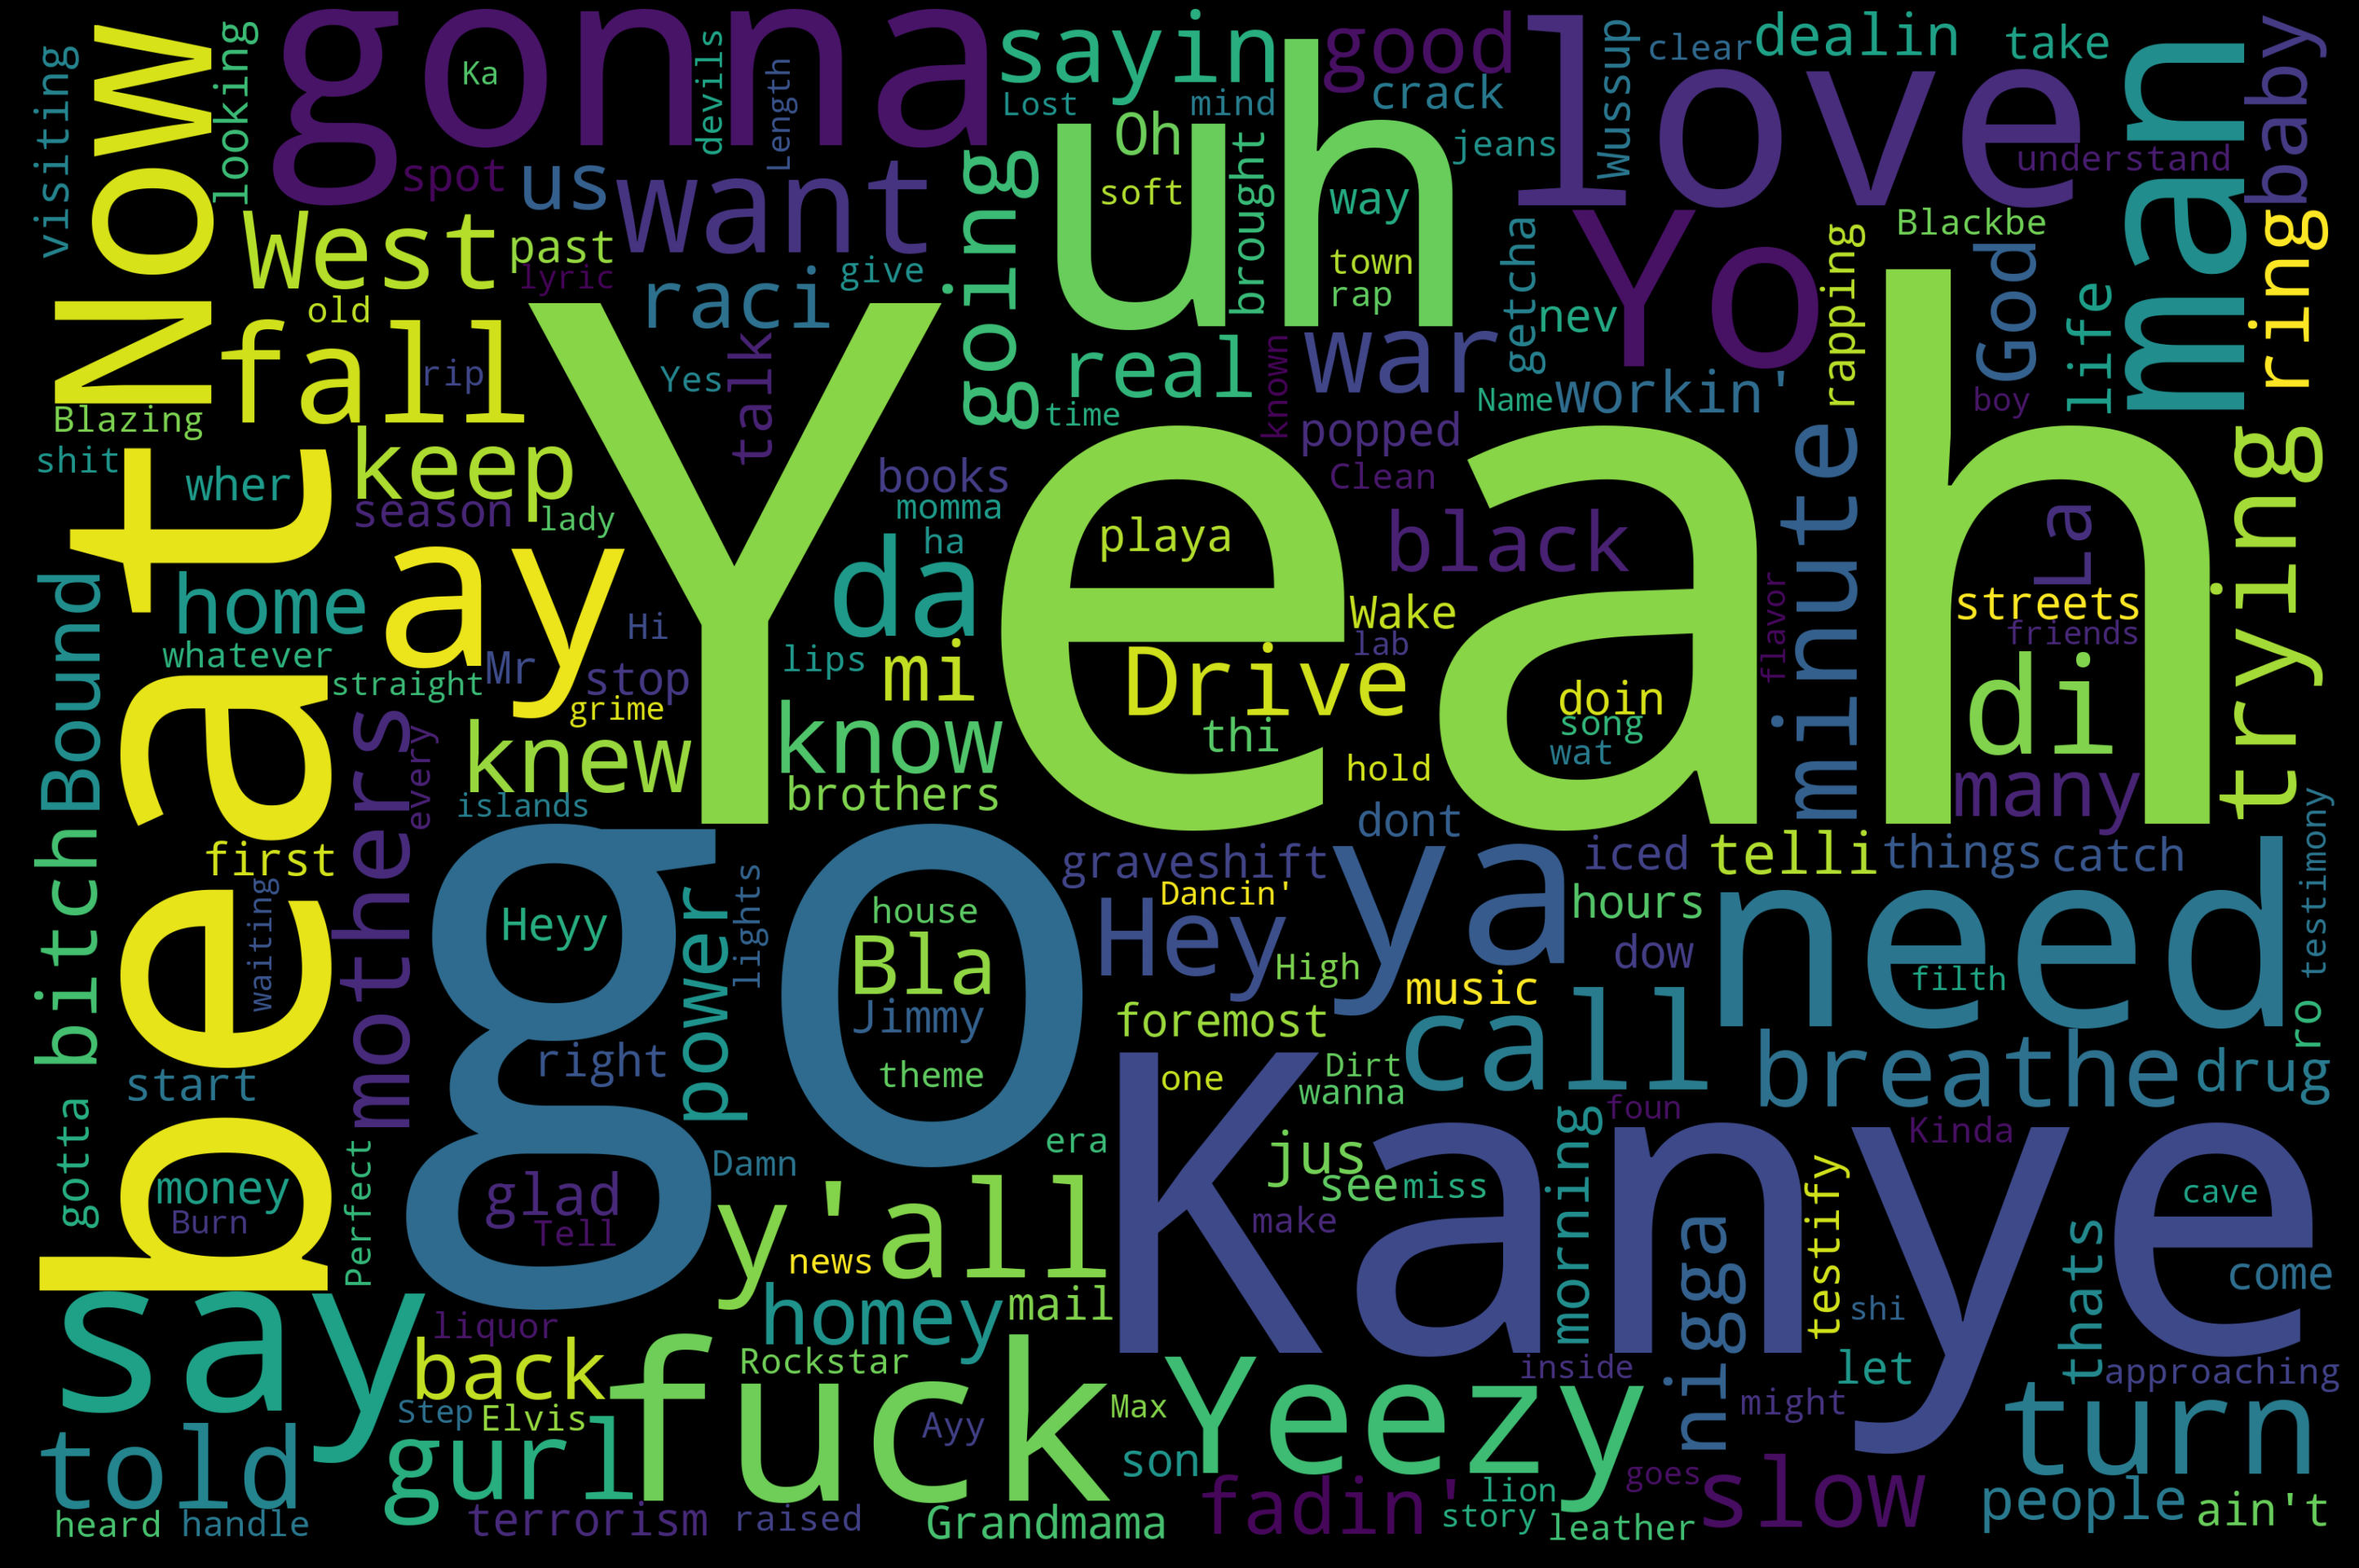

In [48]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(kanye['lyric']))

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()